In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [47]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Backorder/Backorder_2.csv")

In [49]:
df

,current_inventory,transit_duration,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.10,0.13,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.84,0.83,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.69,0.69,1,0,0,1,0,0
1687856,-1.0,8.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.84,0.83,0,0,0,1,0,0
1687857,-1.0,9.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.86,0.84,1,0,0,0,0,1
1687858,62.0,9.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.86,0.84,0,0,0,1,0,0


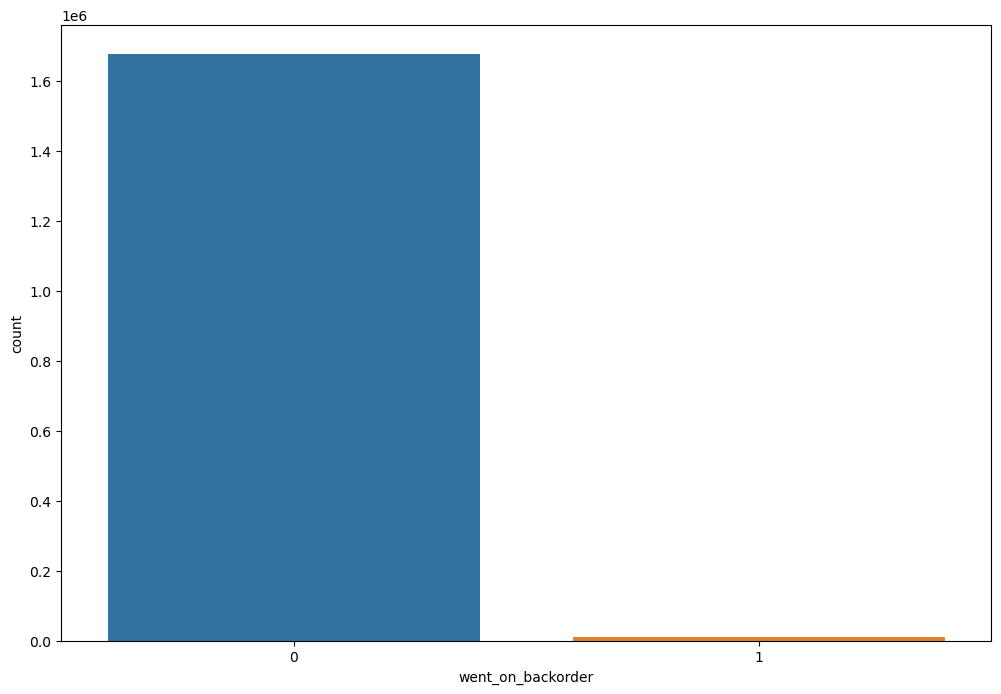

In [50]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x='went_on_backorder')
ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

In [51]:
df['went_on_backorder'].value_counts()

0    1676567
1      11293
Name: went_on_backorder, dtype: int64

As we can see, orders went on backorder are a lot less than the orders which did not go on backorder. Hence we need to sample the data

TRAIN TEST SPLIT

In [77]:
#dropping backorder feature
x = df.drop(["went_on_backorder"],axis=1)
x

,current_inventory,transit_duration,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,0,0,0,1,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,1,0,0,1,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.10,0.13,0,0,0,1,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.84,0.83,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.69,0.69,1,0,0,1,0
1687856,-1.0,8.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.84,0.83,0,0,0,1,0
1687857,-1.0,9.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.86,0.84,1,0,0,0,0
1687858,62.0,9.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.86,0.84,0,0,0,1,0


In [78]:
y = df['went_on_backorder']
x.shape, y.shape

((1687860, 18), (1687860,))

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1181502, 18), (1181502,), (506358, 18), (506358,))

Applying SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(random_state=101, sampling_strategy = 1.0)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [82]:
x_train.shape, y_train.shape

((2347230, 18), (2347230,))

<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

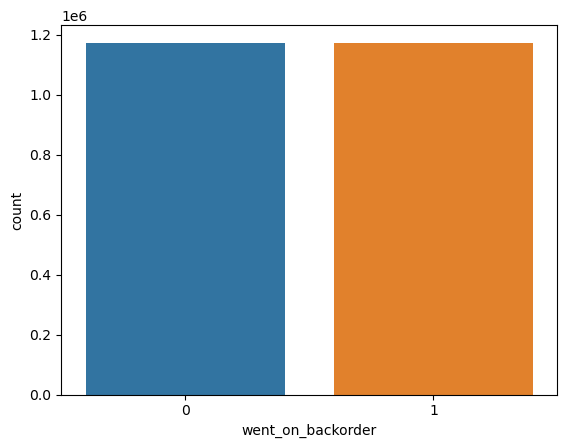

In [83]:
sns.countplot(y_train)

MODEL BUILDING

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

1. Logistic Regression

In [85]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred = logreg.predict(x_test)
accuracy = round(accuracy_score(y_test,y_pred)*100,2)
accuracy

85.34

In [87]:
acc_log_lr = round(logreg.score(x_train, y_train) * 100, 2)
acc_log_lr

64.92

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    502952
           1       0.02      0.43      0.04      3406

    accuracy                           0.85    506358
   macro avg       0.51      0.64      0.48    506358
weighted avg       0.99      0.85      0.91    506358



In [89]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[430660,  72292],
       [  1933,   1473]], dtype=int64)

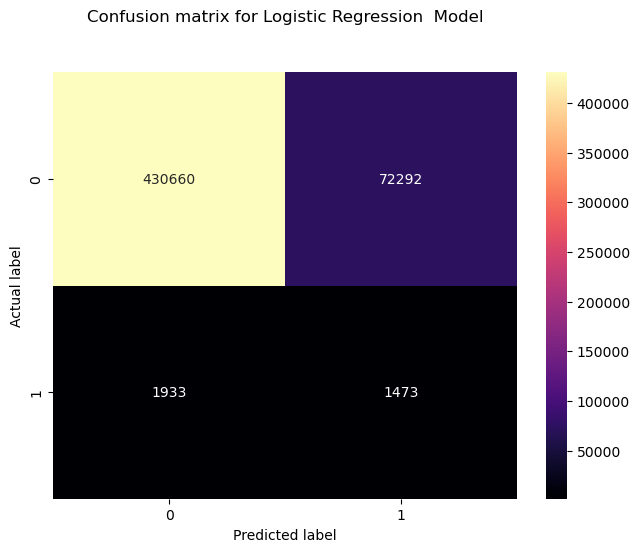

In [90]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot = True, cmap = 'magma',
           fmt = 'g')
plot.tight_layout()
plot.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')
plot.show()

2. Decision Tree

In [91]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  

DecisionTreeClassifier()

In [92]:
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.72

In [93]:
acc_log_dt = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_log_dt

99.72

In [94]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    502952
           1       0.25      0.41      0.31      3406

    accuracy                           0.99    506358
   macro avg       0.62      0.70      0.65    506358
weighted avg       0.99      0.99      0.99    506358



In [95]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Y_pred)
conf_mat

array([[498875,   4077],
       [  2022,   1384]], dtype=int64)

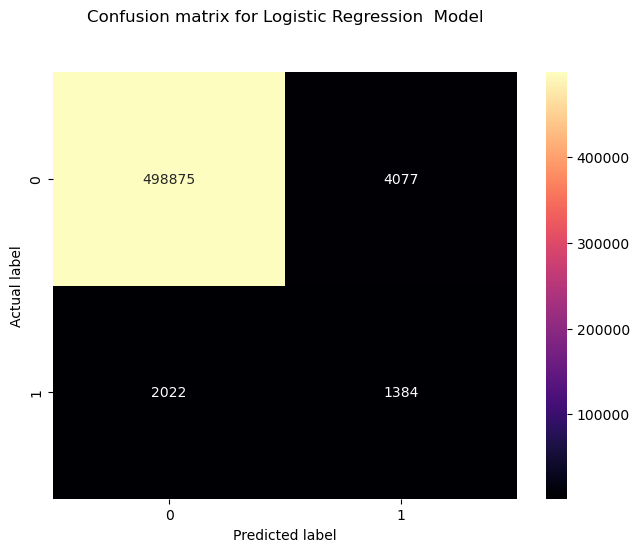

In [96]:
#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Y_pred)), annot = True, cmap = 'magma',
           fmt = 'g')
plot.tight_layout()
plot.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')
plot.show()

3. Random Forest

In [97]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [99]:
random_forest.score(x_test,y_test)

0.9933011821675574

In [100]:
print(classification_report(y_test,Y_prediction))
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Y_prediction)
print(conf_mat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    502952
           1       0.50      0.45      0.48      3406

    accuracy                           0.99    506358
   macro avg       0.75      0.73      0.74    506358
weighted avg       0.99      0.99      0.99    506358

[[501418   1534]
 [  1858   1548]]


4. GradientBoosting

In [102]:
gbmodel = GradientBoostingClassifier(random_state = 101)
#Fit the training set
gbmodel.fit(x_train, y_train)

GradientBoostingClassifier(random_state=101)

In [104]:
gbmodel_prediction = gbmodel.predict(x_test)

In [105]:
#get the classification report
gbmodel_report =  classification_report(y_test, gbmodel_prediction)
#print the report
print(gbmodel_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    502952
           1       0.05      0.82      0.10      3406

    accuracy                           0.90    506358
   macro avg       0.53      0.86      0.52    506358
weighted avg       0.99      0.90      0.94    506358



FEATURE IMPORTANCE

<AxesSubplot:xlabel='Score', ylabel='Feature'>

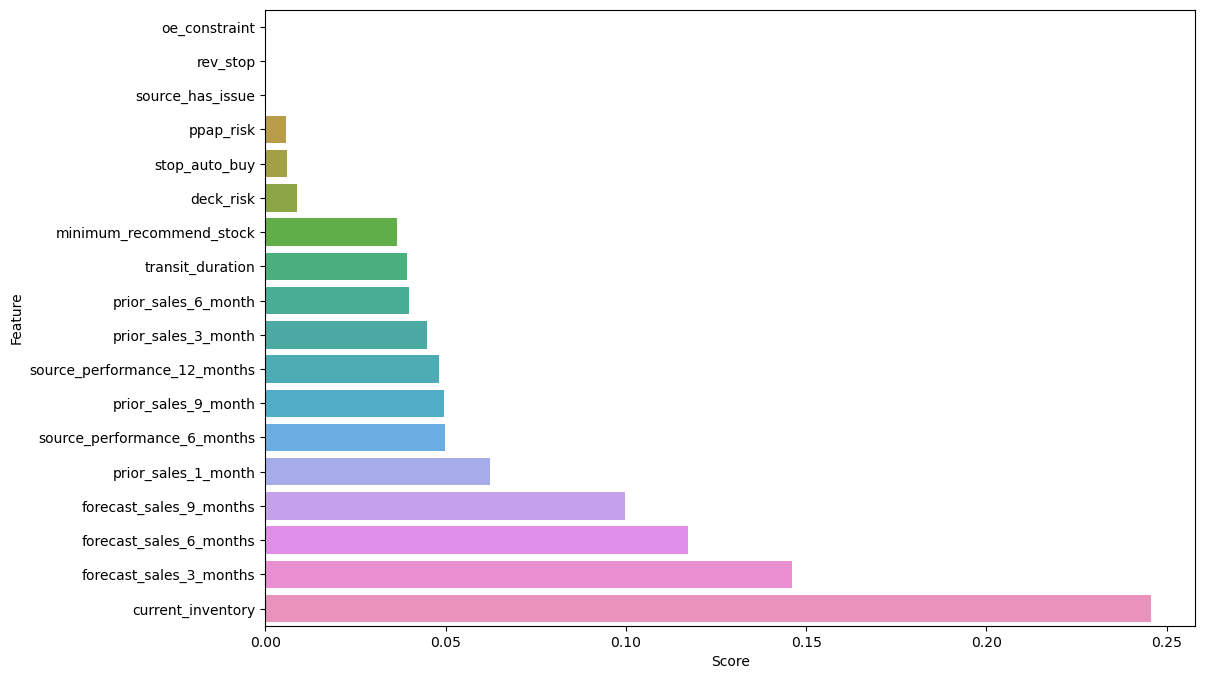

In [107]:
plot.figure(figsize = (12,8))
sns.barplot(x = 'Score',y = 'Feature', 
            data = pd.DataFrame({'Feature':x_train.columns, 'Score':random_forest.feature_importances_}).sort_values('Score'))

ROC curve

Text(0.5, 1.0, 'ROC Curve')

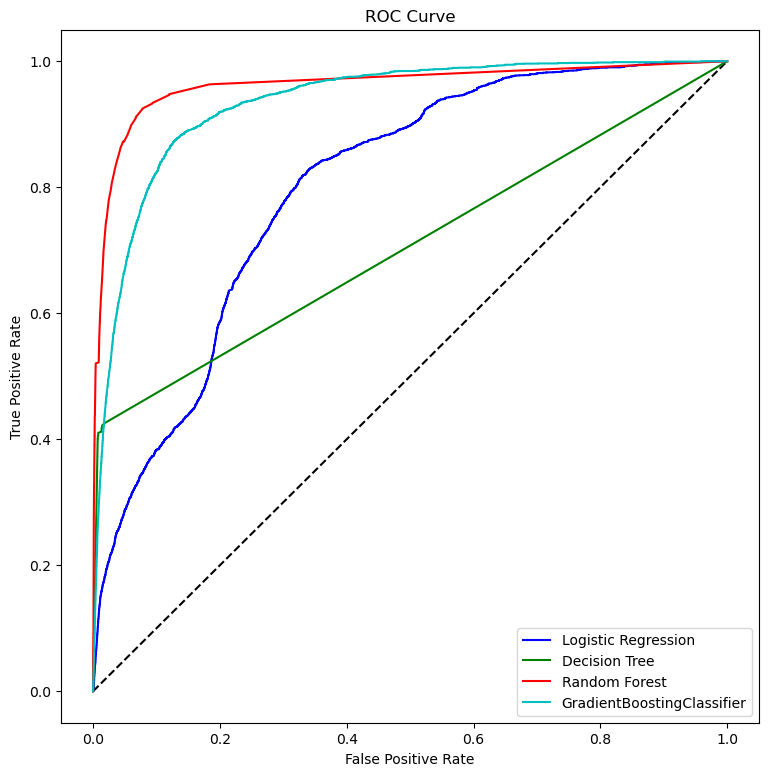

In [111]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plot.plot([0, 1], [0, 1], 'k--')
estimators =[logreg, decision_tree, random_forest, gbmodel]
classifiers=['Logistic Regression', 'Decision Tree', 'Random Forest','GradientBoostingClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.legend(loc=4)
plot.title('ROC Curve')